In [1]:
import pandas as pd
import numpy as np

df_business = pd.read_csv('dataset/business_fixed.csv', engine="python")
df_eco = pd.read_csv('dataset/economy_fixed.csv', engine="python")

In [2]:
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [3]:
df_business = df_business.map(lambda x: x.strip() if isinstance(x, str) else x)

df_business = df_business.map(lambda x: " ".join(x.split()) if isinstance(x, str) else x)

df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,"46,690"


In [4]:
df_eco = df_eco.map(lambda x: x.strip() if isinstance(x, str) else x)

df_eco = df_eco.map(lambda x: " ".join(x.split()) if isinstance(x, str) else x)

df_eco.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [5]:
df_business['business'] = 1
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,business
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",1
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",1
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,"42,220",1
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,"44,450",1
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,"46,690",1


In [6]:
df_eco['business'] = 0
df_eco.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,business
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",0
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",0
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",0
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",0
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",0


In [7]:
df = pd.concat([df_business, df_eco], ignore_index=True)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,business
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",1
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",1
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,"42,220",1
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,"44,450",1
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,"46,690",1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  business    300261 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 27.5+ MB


In [9]:
df['airline'].unique()

array(['Air India', 'Vistara', 'SpiceJet', 'AirAsia', 'GO FIRST',
       'Indigo', 'Trujet', 'StarAir'], dtype=object)

In [10]:
df['stop'].unique()

array(['non-stop', '1-stop', '1-stop Via IDR', '1-stop Via IXU',
       '1-stop Via Chennai', '1-stop Via Lucknow', '1-stop Via STV',
       '1-stop Via Hyderabad', '1-stop Via GAY', '2+-stop',
       '1-stop Via Guwahati', '1-stop Via GAU', '1-stop Via VTZ',
       '1-stop Via NDC', '1-stop Via IXE', '1-stop Via Raipur',
       '1-stop Via PAT', '1-stop Via RPR', '1-stop Via Patna',
       '1-stop Via Kolkata', '1-stop Via HYD', '1-stop Via Delhi',
       '1-stop Via Bhubaneswar', '1-stop Via BBI', '1-stop Via Surat',
       '1-stop Via Indore', '1-stop Via GOP', '1-stop Via Nagpur',
       '1-stop Via NAG', '1-stop Via Vishakhapatnam',
       '1-stop Via Mangalore', '1-stop Via Mumbai', '1-stop Via KLH',
       '1-stop Via MYQ', '1-stop Via Kolhapur', '1-stop Via JRG',
       '1-stop Via Ranchi', '1-stop Via IXR', '1-stop Via JGB',
       '1-stop Via Mysore'], dtype=object)

In [11]:
df["price"] = df["price"].str.replace(",", "", regex=True).astype(int)

In [12]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,business
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,1
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,1
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220,1
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450,1
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690,1


In [13]:
df.describe()

,num_code,price,business
count,300261.000000,300261.000000,300261.000000
mean,1417.771709,20883.717666,0.311352
std,1974.514439,22695.911266,0.463047
min,101.000000,1105.000000,0.000000
25%,637.000000,4783.000000,0.000000
50%,818.000000,7425.000000,0.000000
75%,927.000000,42521.000000,1.000000
max,9991.000000,123071.000000,1.000000


In [14]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.dayofweek
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,business,day,month,day_of_week
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,1,11,2,4
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,1,11,2,4
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220,1,11,2,4
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450,1,11,2,4
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690,1,11,2,4


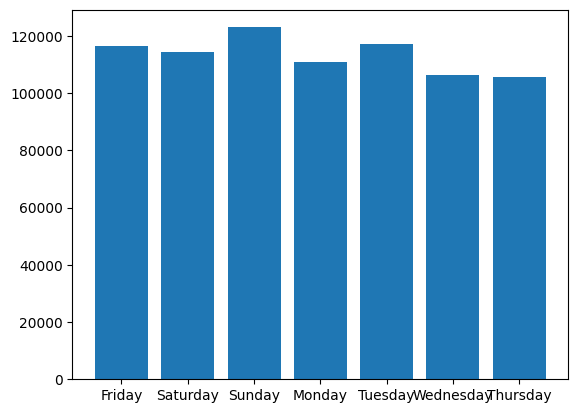

In [15]:
import matplotlib.pyplot as plt

plt.bar(df["date"].dt.day_name(),df['price'])
plt.show()

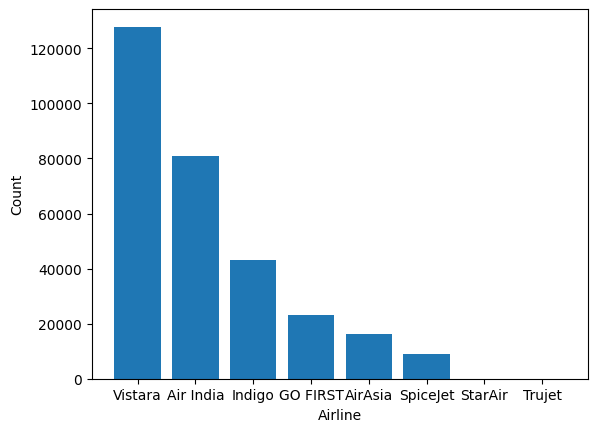

In [16]:
al_counts = df['airline'].value_counts()
plt.bar(al_counts.index, al_counts)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

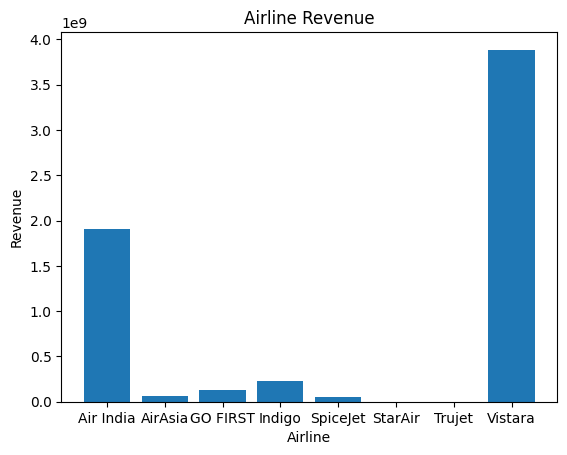

In [17]:
value_airline = df['price'].groupby(df['airline']).sum()
plt.bar(value_airline.index,value_airline)
plt.xlabel('Airline')
plt.ylabel('Revenue')
plt.title('Airline Revenue')
plt.show()

In [18]:
def stops_to_number(stop_str):
    if 'non-stop' in stop_str.lower():
        return 0
    else:     
        import re
        match = re.search(r'\d+', stop_str)
        if match:
            return int(match.group())
        else:
            return None  

df['num_stops'] = df['stop'].apply(stops_to_number)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,business,day,month,day_of_week,num_stops
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,1,11,2,4,0
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,1,11,2,4,0
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220,1,11,2,4,1
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450,1,11,2,4,1
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690,1,11,2,4,1


In [19]:
df['num_stops'].unique()

array([0, 1, 2], dtype=int64)

In [20]:
df['from'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [21]:
df['to'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)
categorical_cols = ['from', 'to', 'airline']
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

df_final = pd.concat([df, encoded_df], axis=1)

df_final.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,business,day,month,day_of_week,num_stops,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,1,11,2,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,1,11,2,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220,1,11,2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450,1,11,2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690,1,11,2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
import re


def time_to_minutes(t):
    hours = 0
    minutes = 0
    # Find hours
    h_match = re.search(r'(\d+)h', t)
    if h_match:
        hours = int(h_match.group(1))
    # Find minutes
    m_match = re.search(r'(\d+)m', t)
    if m_match:
        minutes = int(m_match.group(1))
    return hours * 60 + minutes

df_final['time_minutes'] = df_final['time_taken'].apply(time_to_minutes)
df_final['time_minutes'].head()

0     120
1     135
2    1485
3    1590
4     400
Name: time_minutes, dtype: int64

In [24]:
df_final.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'business', 'day',
       'month', 'day_of_week', 'num_stops', 'from_Bangalore', 'from_Chennai',
       'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai',
       'to_Bangalore', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai', 'airline_Air India', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'time_minutes'],
      dtype='object')

In [25]:
df_final = df_final.drop(columns=['date','airline','ch_code','num_code','dep_time','from','time_taken','stop','arr_time','to'])
df_final.head()

,price,business,day,month,day_of_week,num_stops,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,time_minutes
0,25612,1,11,2,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120
1,25612,1,11,2,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135
2,42220,1,11,2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1485
3,44450,1,11,2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1590
4,46690,1,11,2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400


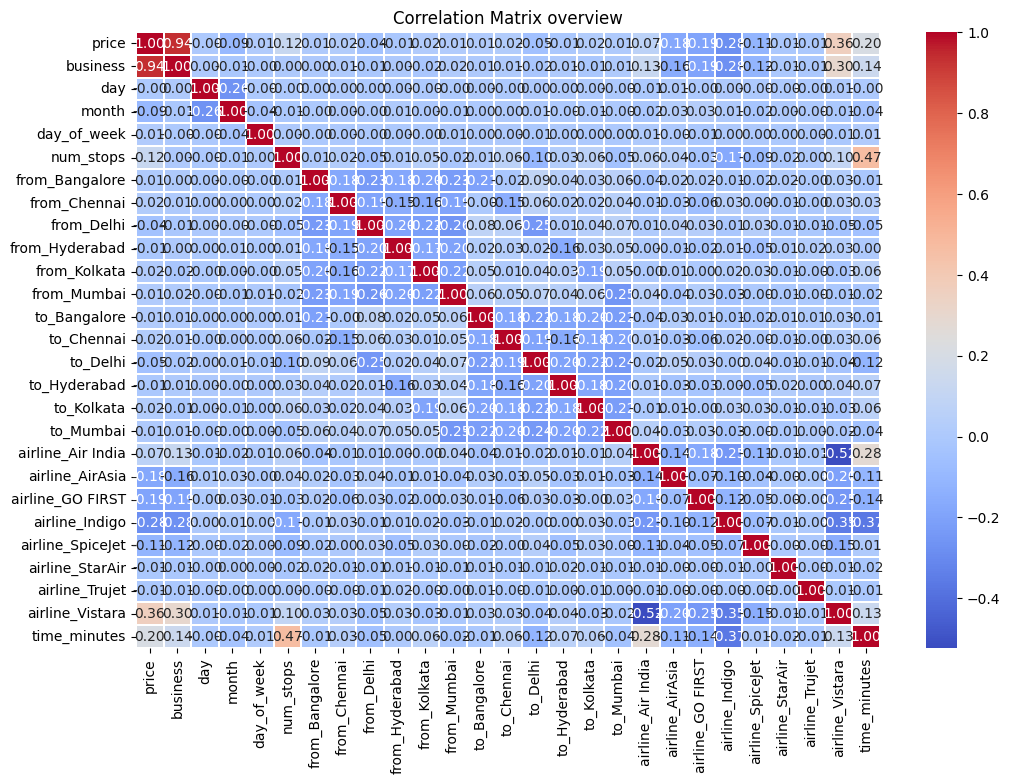

In [26]:
import seaborn as sns

corr = df_final.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',linewidths=0.1)
plt.title('Correlation Matrix overview')
plt.show()

In [27]:
X = df_final.drop(columns=['price'])
y = df_final['price']

In [28]:
X.head()

,business,day,month,day_of_week,num_stops,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,time_minutes
0,1,11,2,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120
1,1,11,2,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135
2,1,11,2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1485
3,1,11,2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1590
4,1,11,2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400


In [29]:
y.head()

0    25612
1    25612
2    42220
3    44450
4    46690
Name: price, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 , random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'Mean square error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')

Mean square error: 47125790.1673223
Mean Absolute Error: 4501.966958580294
Root Mean Square Error: 6864.822661024996


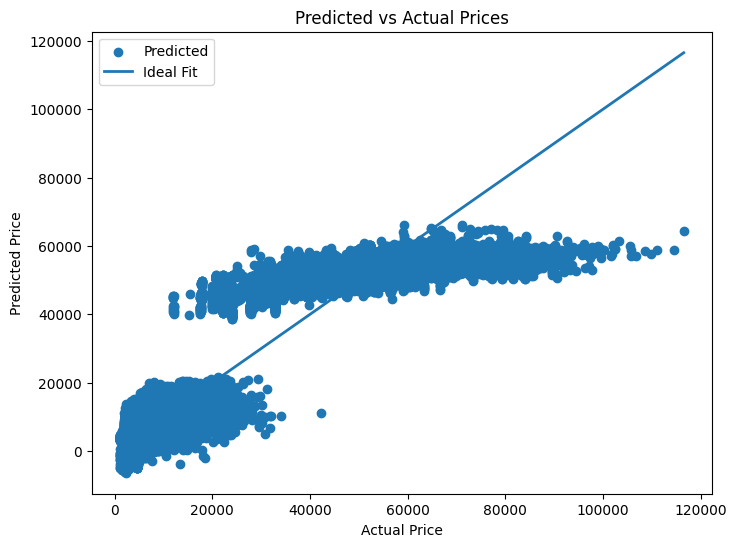

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

In [35]:
df_final.to_csv('dataset/cleaned_data.csv')

In [36]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [37]:
lasso = Lasso(alpha=1000)
lasso.fit(X_train, y_train)

Lasso(alpha=1000)

In [44]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.7)
en.fit(X_train, y_train)

ElasticNet(alpha=0.7)

In [45]:
coeff = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': model.coef_,
    'Ridge': ridge.coef_,
    'lasso': lasso.coef_,
    'ElasticNet' : en.coef_,
})

print(coeff)

              Feature  Linear Regression  ...         lasso    ElasticNet
0            business       45171.836376  ...  40575.355904  16336.890521
1                 day         -73.292891  ...     -0.000000    -34.812415
2               month       -4042.288653  ...     -0.000000  -1558.486981
3         day_of_week         127.721906  ...      0.000000    121.646470
4           num_stops        5739.608738  ...      0.000000    825.555009
5      from_Bangalore         353.518740  ...      0.000000    175.367406
6        from_Chennai         256.466345  ...      0.000000    134.362492
7          from_Delhi       -1230.865978  ...     -0.000000   -480.027060
8      from_Hyderabad       -1336.914098  ...     -0.000000   -315.375537
9        from_Kolkata        1835.034147  ...      0.000000    313.476899
10        from_Mumbai         122.760844  ...      0.000000    170.193616
11       to_Bangalore         386.113527  ...      0.000000    186.235984
12         to_Chennai          28.5564

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1200x800 with 0 Axes>

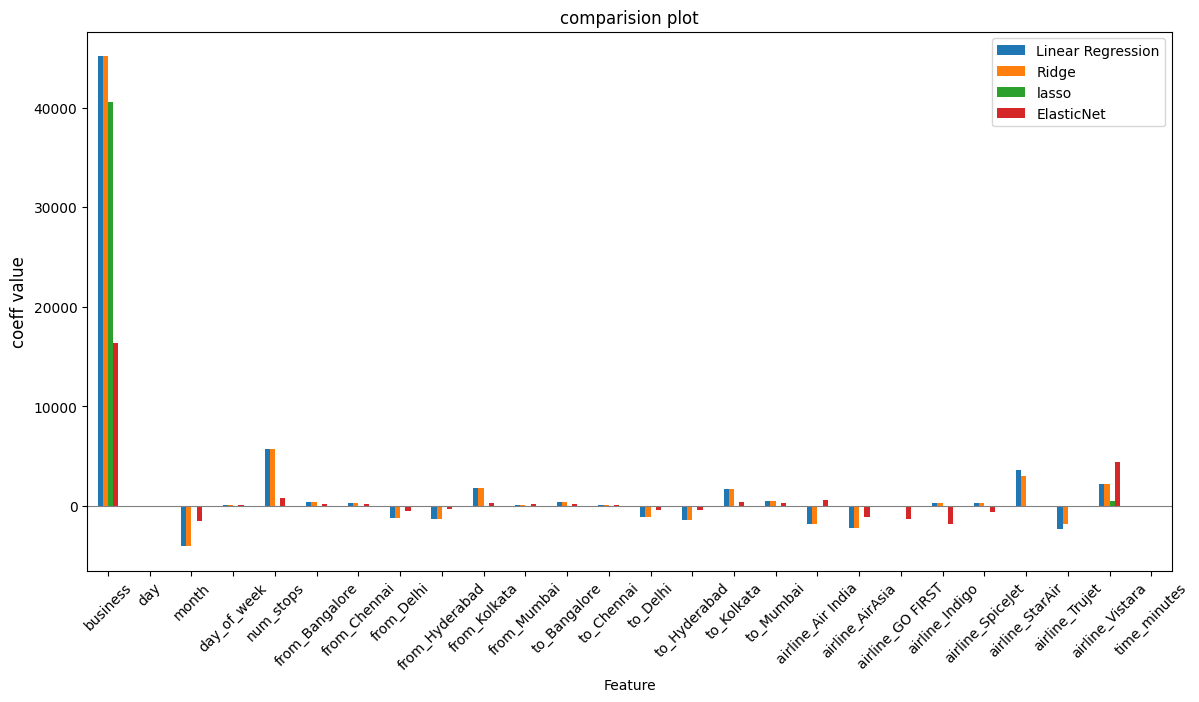

In [46]:
plt.figure(figsize=(12,8))
coeff.plot(x='Feature',y=['Linear Regression','Ridge','lasso','ElasticNet'], kind='bar',figsize=(14,7))
plt.title('comparision plot')
plt.ylabel('coeff value', fontsize=12)
plt.axhline(0, color='grey',linewidth=0.8)
plt.xticks(rotation=45)
plt.grid(axis=y, linestyle='--',alpha=0.7)
plt.tight_layout()